In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('excel_file.xlsx')

In [3]:
data

,Name,Author,Language,Text
0,«Морозко»,Народные,Русские,"Живало-бывало, – жил дед да с другой женой. У ..."
1,«Колобок»,Народные,Русские,Жил-был старик со старухою. Просит старик: «Ис...
2,«Теремок»,Народные,Русские,Стоит в поле теремок. Бежит мимо мышка-норушка...
3,«Репка»,Народные,Русские,"Посадил дед репку — выросла репка большая, пре..."
4,«Крошечка-Хаврошечка»,Народные,Русские,"Вы знаете, что есть на свете люди и хорошие, е..."
...,...,...,...,...
4470,«Как бедняк отказался от богатства»,Народные,Аварские,Жил-был на свете богатый скотовод. Перед смерт...
4471,«Бедняк и куса»,Народные,Аварские,"Что рассказать, о чем не говорить? Жила не жил..."
4472,"«Орешек, пестик, шило и лопатка»",Народные,Абхазские,"Жили-были Орешек, Пестик, Шило и Лопатка. Реши..."
4473,«Напрасная предусмотрительность»,Народные,Абхазские,Село Абжаква издавна славилось своим кислым мо...


In [9]:
# Удалим ненужные столбцы:

In [4]:
data = data.drop(['Author', 'Language'], axis=1)

In [5]:
data

,Name,Text
0,«Морозко»,"Живало-бывало, – жил дед да с другой женой. У ..."
1,«Колобок»,Жил-был старик со старухою. Просит старик: «Ис...
2,«Теремок»,Стоит в поле теремок. Бежит мимо мышка-норушка...
3,«Репка»,"Посадил дед репку — выросла репка большая, пре..."
4,«Крошечка-Хаврошечка»,"Вы знаете, что есть на свете люди и хорошие, е..."
...,...,...
4470,«Как бедняк отказался от богатства»,Жил-был на свете богатый скотовод. Перед смерт...
4471,«Бедняк и куса»,"Что рассказать, о чем не говорить? Жила не жил..."
4472,"«Орешек, пестик, шило и лопатка»","Жили-были Орешек, Пестик, Шило и Лопатка. Реши..."
4473,«Напрасная предусмотрительность»,Село Абжаква издавна славилось своим кислым мо...


In [6]:
data['Text'][0]

'Живало-бывало, – жил дед да с другой женой. У деда была дочка и у бабы была дочка. Все знают, как за мачехой жить: перевернешься – бита и недовернешься – бита. А родная дочь что ни сделает – за все гладят по головке: умница. Падчерица и скотину поила-кормила, дрова и воду в избу носила, печь топила, избу мела еще до свету… Ничем старухе не угодить – все не так, все худо. Ветер хоть пошумит, да затихнет, а старая баба расходится – не скоро уймется. Вот мачеха и придумала падчерицу со свету сжить. — Вези, вези ее, старик, – говорит мужу, – куда хочешь, чтобы мои глаза ее не видали! Вези ее в лес, на трескучий мороз. Старик затужил, заплакал, однако делать нечего, бабы не переспоришь. Запряг лошадь: – Садись, милая дочь, в сани. Повез бездомную в лес, свалил в сугроб под большую ель и уехал. Девушка сидит под елью, дрожит, озноб ее пробирает. Вдруг слышит – невдалеке Морозко по елкам потрескивает, с елки на елку поскакивает, пощелкивает. Очутился на той ели, под которой девица сидит, и с

In [13]:
# Удалим всю пунктуацию, лишние пробелы и приведем текст к нижнему регистру:

In [7]:
import string
string.punctuation += '—«»—…–“”'
punct = string.punctuation.replace('|', '')
transtab = str.maketrans(dict.fromkeys(punct, ' '))
data = data.assign(Text=data['Text'].str.translate(transtab))

In [8]:
data['Text'] = pd.Series([i.replace('\n',' ').replace('\r\n',' ').replace('  ',' ').replace('  ',' ') for i in data['Text']])
data['Text'] = data['Text'].map(lambda x: x.lower())

In [9]:
data['Text'][0]

'живало бывало жил дед да с другой женой у деда была дочка и у бабы была дочка все знают как за мачехой жить перевернешься бита и недовернешься бита а родная дочь что ни сделает за все гладят по головке умница падчерица и скотину поила кормила дрова и воду в избу носила печь топила избу мела еще до свету ничем старухе не угодить все не так все худо ветер хоть пошумит да затихнет а старая баба расходится не скоро уймется вот мачеха и придумала падчерицу со свету сжить вези вези ее старик говорит мужу куда хочешь чтобы мои глаза ее не видали вези ее в лес на трескучий мороз старик затужил заплакал однако делать нечего бабы не переспоришь запряг лошадь садись милая дочь в сани повез бездомную в лес свалил в сугроб под большую ель и уехал девушка сидит под елью дрожит озноб ее пробирает вдруг слышит невдалеке морозко по елкам потрескивает с елки на елку поскакивает пощелкивает очутился на той ели под которой девица сидит и сверху ее спрашивает тепло ли тебе девица тепло морозушко тепло бат

In [17]:
# Удалим стоп-слова и превратим тексты в токены:

In [10]:
import gensim
from gensim.utils import simple_preprocess
from gensim.utils import tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stop_words = stopwords.words('russian')
stop_words.extend(['это', 'э', 'эх', 'свой', 'тот', 'один', 'который', 'мой', 'такой', 'ты', 'какой', 'наш', 'сам', 'весь','голован', 'женали', 'земляй', 'ногай', 'тяф', 'еи', 'ам', 'ух', 'ои', 'неи', 'тяв'])

In [12]:
table = data.Text.values.tolist()

In [13]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(word_tokenize(str(sentence)))

In [14]:
table = data.Text.values.tolist()
data_words = list(sent_to_words(table))

In [15]:
data_words = [[word for word in i if word not in stop_words] for i in data_words]

In [24]:
# Удалим слова, которые встречаются меньше 5-ти раз во всем корпусе:

In [16]:
import itertools
united_list=list(itertools.chain.from_iterable(data_words))

In [17]:
from nltk import FreqDist

In [18]:
fdist = FreqDist(united_list)

In [19]:
fdist = dict(fdist)

In [20]:
rare_words_remove = [k for k,v in fdist.items() if v<= 5]

In [21]:
clean_data_words = [[word for word in i if word not in rare_words_remove] for i in data_words]

In [41]:
# Для лемматизации можно использовать pymorphy или Mystem. 
# Mystem работает очень медленно (около 3 часов), но некоторые слова разбирает лучше, чем pymorphy.

In [52]:
# import pymorphy2
# morph_analyzer = pymorphy2.MorphAnalyzer()

In [33]:
# Скрипт для pymorphy для поиска всех слов:

In [124]:
# clean_lemmas = [[morph_analyzer.parse(i[y])[0].normal_form for y in range(len(i))] for i in clean_data_words]

In [15]:
# Скрипт для поиска существительных, прилагательных и глаголов:

In [55]:
# clean_lemmas = [[morph_analyzer.parse(i[y])[0].normal_form for y in range(len(i)) if morph_analyzer.parse(i[y])[0].tag.POS == 'NOUN' or morph_analyzer.parse(i[y])[0].tag.POS == 'ADJF' or morph_analyzer.parse(i[y])[0].tag.POS == 'VERB'] for i in clean_data_words]

In [ ]:
# Скрипт для поиска существительных и глаголов:

In [ ]:
# clean_lemmas = [[morph_analyzer.parse(i[y])[0].normal_form for y in range(len(i)) if morph_analyzer.parse(i[y])[0].tag.POS == 'NOUN' or morph_analyzer.parse(i[y])[0].tag.POS == 'VERB'] for i in clean_data_words]

In [ ]:
# Скрипт для Mystem:

In [22]:
clean_data_words = [' '.join(i) for i in clean_data_words]

In [23]:
clean_data_words[0]

'бывало жил дед женой деда дочка бабы дочка знают мачехой жить родная дочь сделает головке умница падчерица скотину поила кормила дрова воду избу носила печь топила избу мела свету ничем старухе угодить худо ветер старая баба расходится скоро уймется мачеха придумала падчерицу свету сжить вези вези старик говорит мужу хочешь мои глаза видали вези лес трескучий мороз старик затужил заплакал однако делать нечего бабы запряг лошадь садись милая дочь сани повез бездомную лес свалил сугроб большую ель уехал девушка сидит елью дрожит пробирает слышит невдалеке морозко потрескивает елки елку поскакивает пощелкивает очутился той ели которой девица сидит сверху спрашивает тепло тебе девица тепло морозушко тепло батюшка морозко стал ниже спускаться сильнее потрескивает пощелкивает тепло тебе девица тепло тебе красная дух переводит тепло морозушко тепло батюшка морозко ниже спустился пуще затрещал сильнее тепло тебе девица тепло тебе красная тепло тебе девица стала языком шевелит ой тепло голубчи

In [24]:
from pymystem3 import Mystem
mystem = Mystem()

In [25]:
words_analized = [mystem.analyze(i) for i in clean_data_words]

In [51]:
# Скрипт для поиска всех слов:

In [ ]:
# clean_lemmas  = [[parse['analysis'][0]['lex'] for parse in i if parse.get('analysis')] for i in words_analized] 

In [ ]:
# Скрипт для поиска существительных, прилагательных и глаголов:

In [328]:
clean_lemmas  = [[parse['analysis'][0]['lex'] for parse in i if parse.get('analysis') and parse['analysis'][0]['gr'].startswith(('S,', 'A=', 'V,'))] for i in words_analized]

In [54]:
 # Скрипт для поиска существительных и глаголов:

In [189]:
# clean_lemmas  = [[parse['analysis'][0]['lex'] for parse in i if parse.get('analysis') and parse['analysis'][0]['gr'].startswith(('S,', 'V,'))] for i in words_analized]

In [329]:
clean_lemmas[0]

['жить',
 'дед',
 'жена',
 'дед',
 'дочка',
 'баба',
 'дочка',
 'знать',
 'мачеха',
 'жить',
 'родной',
 'дочь',
 'сделать',
 'головка',
 'умница',
 'падчерица',
 'скотина',
 'поить',
 'кормить',
 'дрова',
 'вода',
 'изба',
 'носить',
 'печь',
 'топить',
 'изба',
 'мел',
 'свет',
 'старуха',
 'угождать',
 'ветер',
 'старый',
 'баба',
 'расходиться',
 'униматься',
 'мачеха',
 'придумывать',
 'падчерица',
 'свет',
 'сживать',
 'старик',
 'говорить',
 'муж',
 'хотеть',
 'глаз',
 'видать',
 'лес',
 'трескучий',
 'мороз',
 'старик',
 'затужить',
 'заплакать',
 'делать',
 'баба',
 'лошадь',
 'садиться',
 'милый',
 'дочь',
 'сани',
 'повезти',
 'бездомный',
 'лес',
 'сугроб',
 'большой',
 'ель',
 'уезжать',
 'девушка',
 'сидеть',
 'ель',
 'дрожать',
 'слышать',
 'морозко',
 'потрескивать',
 'елка',
 'елка',
 'пощелкивать',
 'очутиться',
 'есть',
 'девица',
 'сидеть',
 'девица',
 'морозушко',
 'батюшка',
 'морозко',
 'становиться',
 'спускаться',
 'потрескивать',
 'пощелкивать',
 'девица',
 'к

In [330]:
data['Lemmas'] = clean_lemmas

In [32]:
data = data.drop(['Text'], axis=1)

In [336]:
data

,Name,Language,Lemmas
0,«Морозко»,Русские,"[жить, дед, жена, дед, дочка, баба, дочка, зна..."
1,«Колобок»,Русские,"[жить, старик, старуха, просить, старик, испеч..."
2,«Теремок»,Русские,"[стоять, поле, теремок, бежать, мышка, норушка..."
3,«Репка»,Русские,"[посадить, дед, репка, вырастать, большой, пре..."
4,«Крошечка-Хаврошечка»,Русские,"[знать, свет, человек, хороший, бог, бояться, ..."
...,...,...,...
4470,«Как бедняк отказался от богатства»,Аварские,"[жить, свет, богатый, смерть, завещать, стадо,..."
4471,«Бедняк и куса»,Аварские,"[говорить, жить, жить, хун, бедный, старуха, е..."
4472,"«Орешек, пестик, шило и лопатка»",Абхазские,"[жить, орешек, пестик, шило, лопатка, решать, ..."
4473,«Напрасная предусмотрительность»,Абхазские,"[село, кислый, молоко, человек, село, сбривать..."


In [219]:
# Подсчитаем tfidf:

In [337]:
corpus = [' '.join(item) for item in clean_lemmas]

In [338]:
from operator import itemgetter
from sklearn.feature_extraction.text import TfidfVectorizer

In [339]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=5,
                                 use_idf=True, sublinear_tf=True, norm='l2')
tfidf = tfidf_vectorizer.fit_transform(corpus)
feature_names = tfidf_vectorizer.get_feature_names()

In [340]:
def freq(text):
    
    text_freq = []
    
    for document in corpus:
        X = tfidf_vectorizer.transform([document])
        tfidf_scores = [(feature_names[col], X[0, col]) for col in X.nonzero()[1]]
        freq_list = [(word, freq) for word, freq in sorted(tfidf_scores, 
                                                       key=itemgetter(1), 
                                                       reverse=True)]
        freq_list = dict(freq_list)
        text_freq.append(freq_list)
             
    return text_freq

In [341]:
frequency = freq(corpus)

In [342]:
frequency[0]

{'блин': 0.20528272891932614,
 'собачка': 0.18144432230604232,
 'мороз': 0.17983200922858436,
 'падчерица': 0.16338378101443474,
 'елка': 0.16250728330623665,
 'хрыч': 0.16246579714529832,
 'потрескивать': 0.15917687849037596,
 'сани': 0.15893799916088253,
 'мачеха': 0.1509493321490984,
 'сугроб': 0.14024560920320236,
 'девица': 0.13750655892017016,
 'серебро': 0.13325427574057985,
 'косточка': 0.1276411676925434,
 'ель': 0.12378718684638056,
 'короб': 0.11914486559063182,
 'затужить': 0.11776704725656396,
 'поглядывать': 0.11439151828307552,
 'красный': 0.11398522932610891,
 'заголосить': 0.1131492744469806,
 'грешный': 0.1121653758155634,
 'шуба': 0.10857751027659304,
 'заскрипеть': 0.10721334901228034,
 'баба': 0.10664545059467789,
 'дочь': 0.10621884448690849,
 'повезти': 0.1052782156543757,
 'умница': 0.10226132220899727,
 'жених': 0.09960424132578159,
 'поминки': 0.09885604090314405,
 'хоронить': 0.09528183243392885,
 'старуха': 0.09472507566885074,
 'изба': 0.09268010359521664,


In [343]:
keys = [', '.join(item.keys()) for item in frequency]

In [82]:
# Выведем топ-20 слов в отдельный столбец:

In [344]:
import collections
top_20 = [dict(collections.Counter(item).most_common(20)) for item in frequency]

In [345]:
top_20[0]

{'блин': 0.20528272891932614,
 'собачка': 0.18144432230604232,
 'мороз': 0.17983200922858436,
 'падчерица': 0.16338378101443474,
 'елка': 0.16250728330623665,
 'хрыч': 0.16246579714529832,
 'потрескивать': 0.15917687849037596,
 'сани': 0.15893799916088253,
 'мачеха': 0.1509493321490984,
 'сугроб': 0.14024560920320236,
 'девица': 0.13750655892017016,
 'серебро': 0.13325427574057985,
 'косточка': 0.1276411676925434,
 'ель': 0.12378718684638056,
 'короб': 0.11914486559063182,
 'затужить': 0.11776704725656396,
 'поглядывать': 0.11439151828307552,
 'красный': 0.11398522932610891,
 'заголосить': 0.1131492744469806,
 'грешный': 0.1121653758155634}

In [346]:
top_20_words = [', '.join(item.keys()) for item in top_20]

In [347]:
data['Words'] = pd.Series(keys)

In [348]:
data['Top_20'] = pd.Series(top_20_words)

In [350]:
data

,Name,Language,Lemmas,Words,Top_20
0,«Морозко»,Русские,"[жить, дед, жена, дед, дочка, баба, дочка, зна...","блин, собачка, мороз, падчерица, елка, хрыч, п...","блин, собачка, мороз, падчерица, елка, хрыч, п..."
1,«Колобок»,Русские,"[жить, старик, старуха, просить, старик, испеч...","колобок, короб, сметана, катиться, мордочка, п...","колобок, короб, сметана, катиться, мордочка, п..."
2,«Теремок»,Русские,"[стоять, поле, теремок, бежать, мышка, норушка...","терем, зайчик, бочок, лисичка, волчок, сестрич...","терем, зайчик, бочок, лисичка, волчок, сестрич..."
3,«Репка»,Русские,"[посадить, дед, репка, вырастать, большой, пре...","дедок, дедка, бабка, внучка, вытягивать, потян...","дедок, дедка, бабка, внучка, вытягивать, потян..."
4,«Крошечка-Хаврошечка»,Русские,"[знать, свет, человек, хороший, бог, бояться, ...","коровушка, травушка, яблочко, глазок, наткать,...","коровушка, травушка, яблочко, глазок, наткать,..."
...,...,...,...,...,...
4470,«Как бедняк отказался от богатства»,Аварские,"[жить, свет, богатый, смерть, завещать, стадо,...","могила, осел, бедняк, наследство, достояние, б...","могила, осел, бедняк, наследство, достояние, б..."
4471,«Бедняк и куса»,Аварские,"[говорить, жить, жить, хун, бедный, старуха, е...","кус, зурна, осел, бычок, вах, туман, бык, прот...","кус, зурна, осел, бычок, вах, туман, бык, прот..."
4472,"«Орешек, пестик, шило и лопатка»",Абхазские,"[жить, орешек, пестик, шило, лопатка, решать, ...","орешек, шило, лопатка, богач, котел, бык, черд...","орешек, шило, лопатка, богач, котел, бык, черд..."
4473,«Напрасная предусмотрительность»,Абхазские,"[село, кислый, молоко, человек, село, сбривать...","сбривать, кислый, ус, село, поговорка, молоко,...","сбривать, кислый, ус, село, поговорка, молоко,..."


In [351]:
data.to_excel('Frequency.xlsx', encoding='utf-8', index=False)

In [ ]:
# Введем название какой-нибудь сказки и найдем 10 похожих текстов:

In [352]:
data = pd.read_excel('excel_file.xlsx')

In [353]:
data = data.drop(['Author', 'Text'], axis=1)

In [354]:
data

,Name,Language
0,«Морозко»,Русские
1,«Колобок»,Русские
2,«Теремок»,Русские
3,«Репка»,Русские
4,«Крошечка-Хаврошечка»,Русские
...,...,...
4470,«Как бедняк отказался от богатства»,Аварские
4471,«Бедняк и куса»,Аварские
4472,"«Орешек, пестик, шило и лопатка»",Абхазские
4473,«Напрасная предусмотрительность»,Абхазские


In [355]:
input_name = input('Введите название сказки из столбца "Name". ').strip("!?,)(:;\'\".").lower()

Введите название сказки из столбца "Name". морозко


In [356]:
data["Name1"] = data["Name"].str.lower()

In [357]:
res = data[data["Name1"].str.contains(input_name)]

In [358]:
res = res.iloc[0:4474, 0:2]

In [359]:
str = data["Name1"]
if data["Name1"].str.contains(input_name,regex=False).any():
    print(res)
else: 
    print ("В базе данных нет такой сказки.")

                                Name Language
0                          «Морозко»  Русские
1925  «Морозко (изложение Толстого)»  Русские


In [360]:
index = input("Введите индекс сказки из первого столбца. Если есть несколько сказок с одинаковым названием, введите индекс нужной сказки ")
inp = int(index)

Введите индекс сказки из первого столбца. Если есть несколько сказок с одинаковым названием, введите индекс нужной сказки 0


In [361]:
inp_plus_1 = inp + 1

In [362]:
inp_plus_1

1

In [363]:
from sklearn.metrics.pairwise import linear_kernel

In [364]:
cosine_similarities = linear_kernel(tfidf[inp:inp_plus_1], tfidf).flatten()

In [365]:
# Первый текст в списке - это текст из запроса.

In [366]:
result_idx = cosine_similarities.argsort()[:-12:-1]                                                                                                                                                                                                                
data['Name'][result_idx]

0                              «Морозко»
1925      «Морозко (изложение Толстого)»
268                   «Дочь и падчерица»
3891    «Злая мачеха и добрая падчерица»
97                           «Падчерица»
1429                     «Жадная мачеха»
304          «Про кошечку и про собачку»
1471                «Здравствуй, мостик»
91                   «Волшебная дудочка»
10                  «Двенадцать месяцев»
445                  «Девушка в колодце»
Name: Name, dtype: object

In [ ]:
# Нарисуем гистограмму для косинусного сходства:

In [367]:
del str

In [368]:
df1 = data['Name'][result_idx]

In [369]:
df1['Merged'] = df1.index.fillna(' ').astype(str) +' '+ df1.values.astype(str)

In [370]:
import numpy as np

In [371]:
cosine_similarities_dict = np.sort(cosine_similarities)[:-12:-1]

In [372]:
names = df1['Merged'].values.tolist()

In [373]:
dict_1 = dict(zip(names, cosine_similarities_dict))

Text(0.5, 0.98, 'Cosine Similarity')

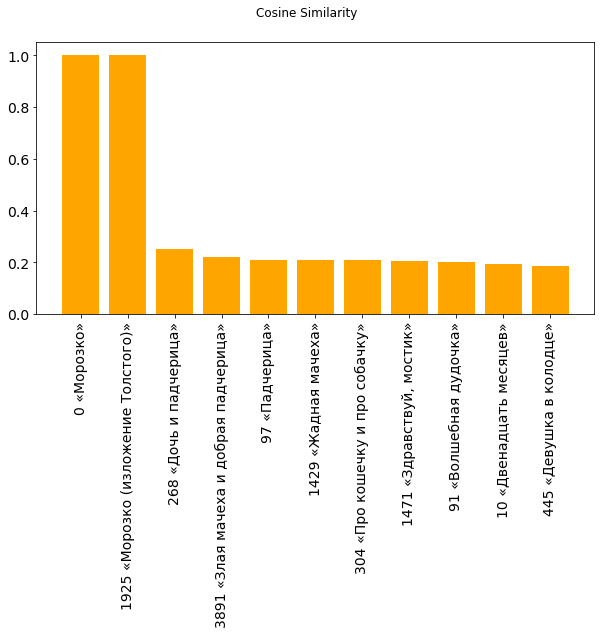

In [374]:
from matplotlib import pyplot as plt
texts = list(dict_1.keys())
values = list(dict_1.values())

fig, axs = plt.subplots(figsize=(10, 5), sharey=True)
axs.bar(texts, values, color = 'orange')
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=14)

fig.suptitle('Cosine Similarity')

In [ ]:
# Создадим облако слов для каждого текста:

In [375]:
texts = [frequency[i] for i in result_idx]

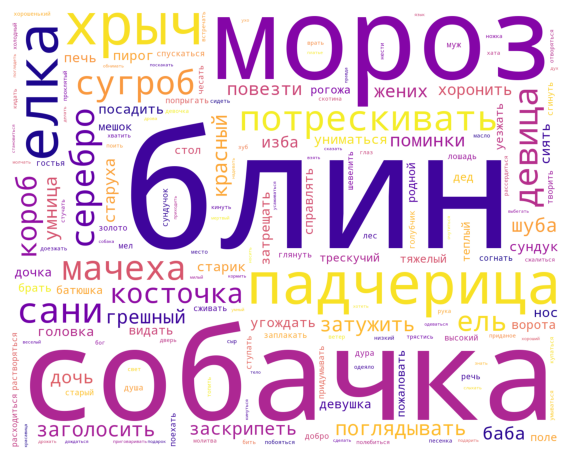

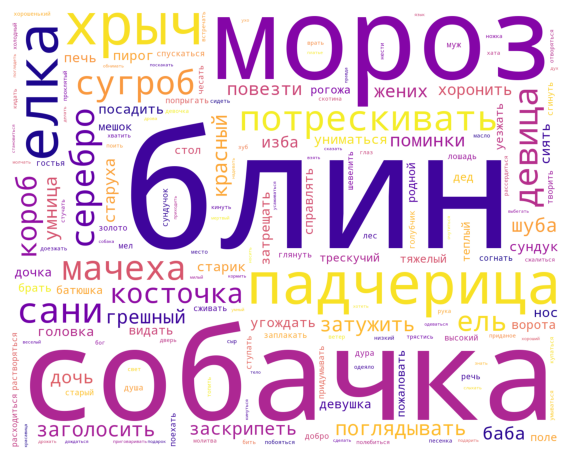

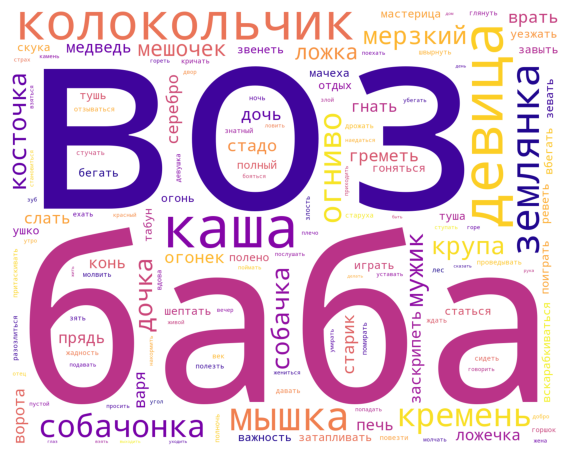

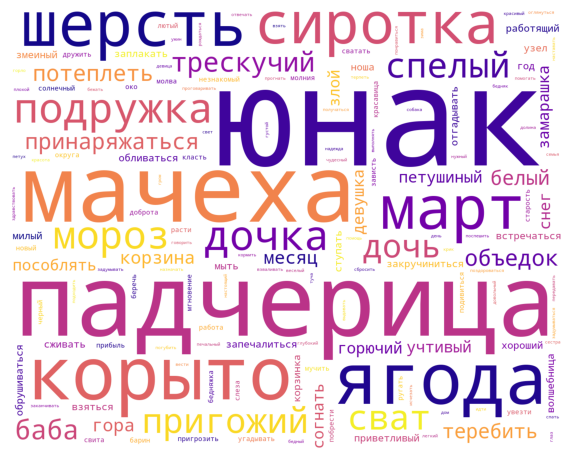

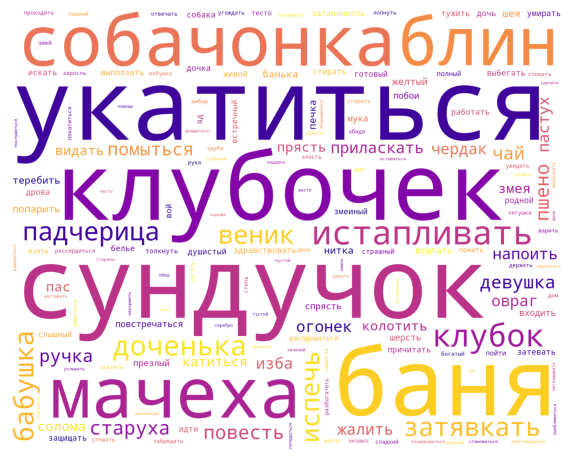

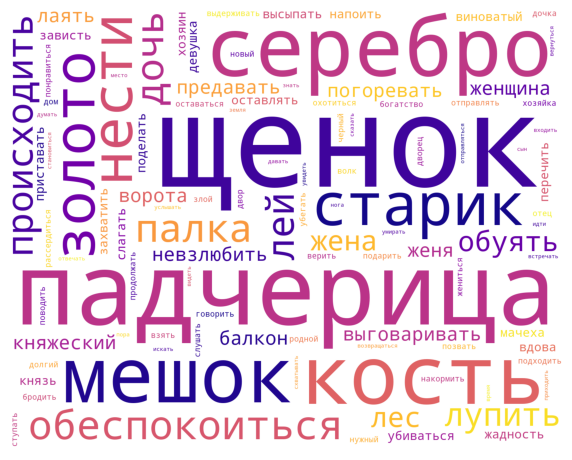

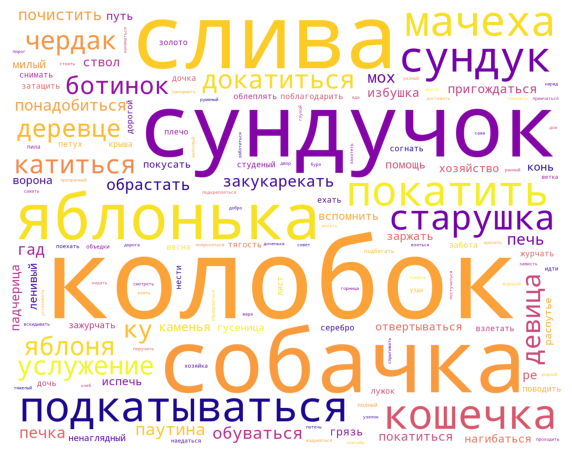

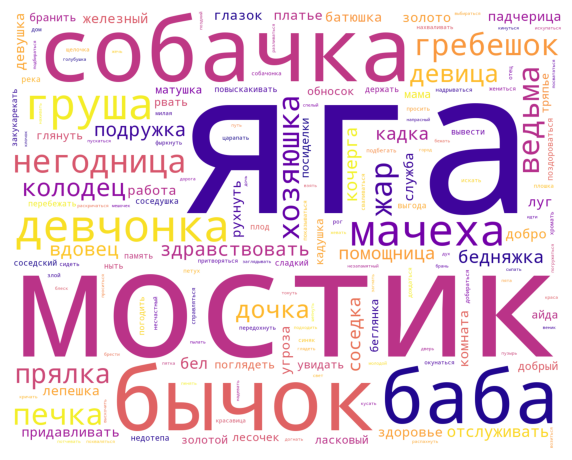

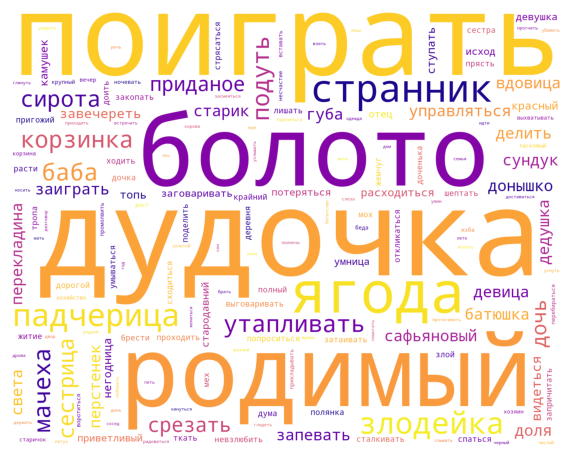

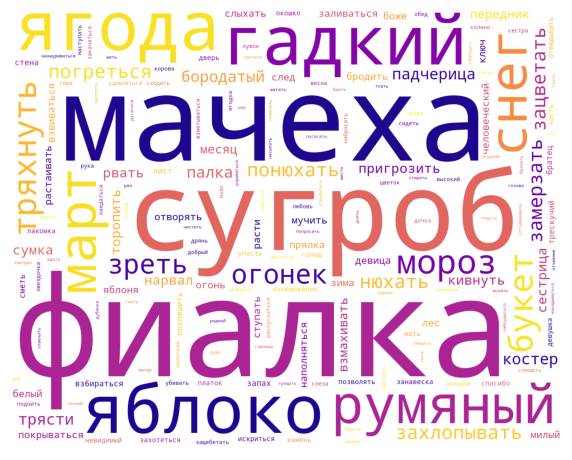

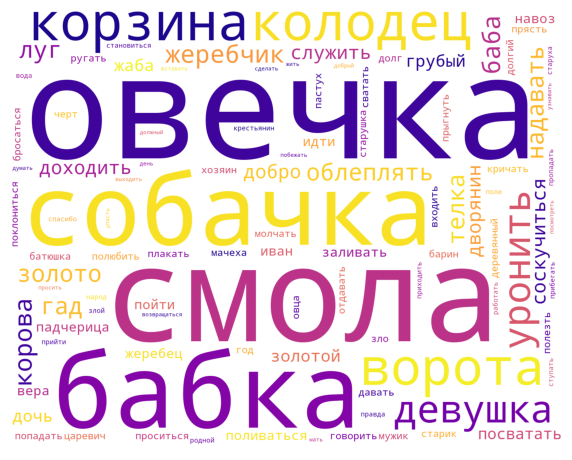

In [376]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in texts:
    wc = WordCloud(max_words=1000, margin=10, background_color='white', colormap="plasma",
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate_from_frequencies(i)
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

In [97]:
# Можно находить похожие тексты, сравнивая топ 20 слов. 
# При совпадении слова в сказке из запроса и сказке из списка, в счет сказки из списка добавляется 1 балл.
# Затем выводятся названия топ 10 сказок, в которых нашлось больше всего совпадений.

In [ ]:
# del str

In [378]:
ind = index + " " + '«'+input_name+'»'

In [379]:
ind

'0 «морозко»'

In [380]:
data['Merged'] = data.index.fillna(' ').astype(str) +' '+ data['Name1'].astype(str)

In [381]:
data['Merged2'] = data.index.fillna(' ').astype(str) +' '+ data['Name'].astype(str)

In [382]:
names = data['Merged'].values.tolist()

In [383]:
names2 = data['Merged2'].values.tolist()

In [384]:
dict_words = dict(zip(names, top_20))

In [385]:
dict_words2 = dict(zip(names2, names))

In [386]:
key_words =  list(dict_words[ind].keys())

In [387]:
import operator

def handler_dict(dicters,key_words):
    scores = {key:0 for key in dicters.keys()}
    for name_text,dicter in dicters.items():
        for key in dicter.keys():
            if key in key_words:
                scores[name_text]+=1        
    return scores

In [388]:
def sort_dict(scores):
    sorted_dict = sorted(scores.items(), key=operator.itemgetter(1),reverse = True)
    for index,element in enumerate(sorted_dict):
        if index>10:
            break
        print('{}.{} - {}'.format(index+1,element[0],element[1]))
if __name__ == '__main__':
    dict_scores = handler_dict(dict_words, key_words)
    dict_scores2 = dict(zip(dict_words2.keys(), dict_scores.values()))
    sort_dict(dict_scores2)

1.0 «Морозко» - 20
2.1925 «Морозко (изложение Толстого)» - 20
3.4 «Крошечка-Хаврошечка» - 3
4.10 «Двенадцать месяцев» - 3
5.97 «Падчерица» - 3
6.268 «Дочь и падчерица» - 3
7.304 «Про кошечку и про собачку» - 3
8.1471 «Здравствуй, мостик» - 3
9.1756 «Ночные плясуны» - 3
10.3891 «Злая мачеха и добрая падчерица» - 3
11.18 «Крошечка-Хаврошечка» - 2


In [ ]:
# Нарисуем гистограмму для сходства по топ-20 слов:

In [389]:
dicter_1 = sorted(dict_scores2.items(), key=operator.itemgetter(1),reverse = True)[0:11]

In [390]:
dicter_1 = dict(dicter_1)

Text(0.5, 0.98, 'Cosine Similarity Top-20')

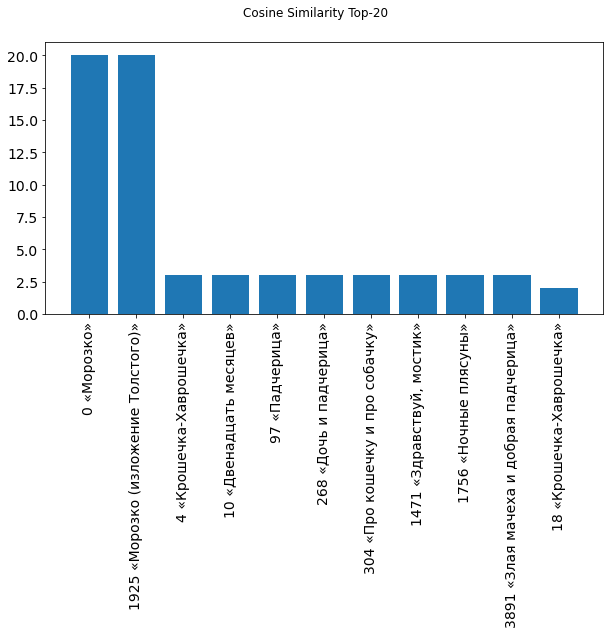

In [391]:
texts = list(dicter_1.keys())
values = list(dicter_1.values())

fig, axs = plt.subplots(figsize=(10, 5), sharey=True)
axs.bar(texts, values)
plt.xticks(rotation=90)  
plt.tick_params(axis='both', which='major', labelsize=14)
fig.suptitle('Cosine Similarity Top-20')

In [ ]:
# Сравним две гистограммы:

Text(0.5, 0.98, 'Cosine Similarity Comparison')

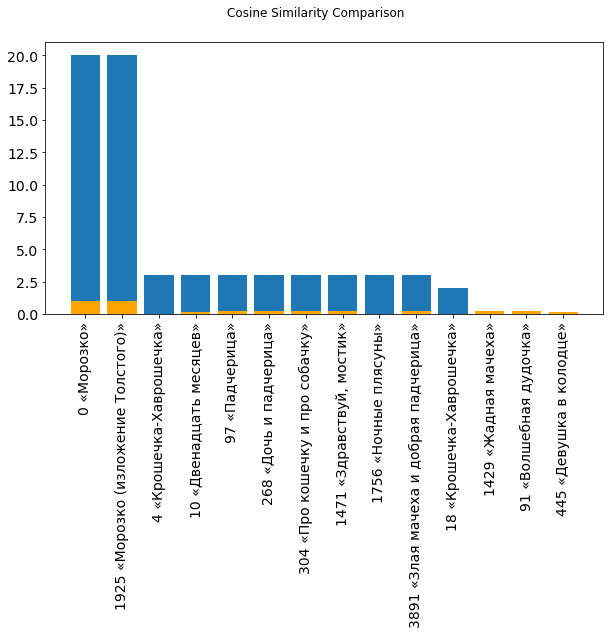

In [392]:
import matplotlib.ticker as ticker
texts = list(dicter_1.keys())
values = list(dicter_1.values())
texts1 = list(dict_1.keys())
values1 = list(dict_1.values())

fig, axs = plt.subplots(figsize=(10, 5), sharey=True)

axs.bar(texts, values)
axs.bar(texts1, values1, color = 'orange')

plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=14)
fig.suptitle('Cosine Similarity Comparison')